In [1]:
import pandas as pd
from scipy.stats import pearsonr
import numpy as np
import seaborn as sns

In [2]:
df5 = pd.read_parquet("../data/processed_data/06_ukbb_outcome_trimmed_diet_bhs_complete_cases_pca_subsystem_dash.parquet")

In [3]:
def scoresCorrelationTable(inputDf, bhsTypeName):

    sexList = ["Overall", "Male", "Female"]
    ageList = ["-", "<50", "50-64", ">64"]
    outputList = []

    for sexType in sexList:
        for ageType in ageList:
            tempList = [bhsTypeName, sexType, ageType]

            if (sexType=="Overall") & (ageType=="-"):
                tempList.extend(list(np.around(
                    pearsonr(inputDf['delta_bhs'], inputDf['delta_biomarker_bhs']),5)))
            elif (sexType=="Overall") & (ageType=="<50"):
                tempList.extend(list(np.around(pearsonr(
                        inputDf[inputDf["age.0.0"]<50]['delta_bhs'], 
                        inputDf[inputDf["age.0.0"]<50]['delta_biomarker_bhs']),5)))
            elif (sexType=="Overall") & (ageType=="50-64"):
                tempList.extend(list(np.around(pearsonr(
                        inputDf[(inputDf["age.0.0"]>=50) & (inputDf["age.0.0"]<=64)]['delta_bhs'], 
                        inputDf[(inputDf["age.0.0"]>=50) & (inputDf["age.0.0"]<=64)]['delta_biomarker_bhs']),5)))
            elif (sexType=="Overall") & (ageType==">64"):
                tempList.extend(list(np.around(pearsonr(
                        inputDf[inputDf["age.0.0"]>64]['delta_bhs'], 
                        inputDf[inputDf["age.0.0"]>64]['delta_biomarker_bhs']),5)))
            elif (sexType!="Overall") & (ageType=="-"):
                tempList.extend(list(np.around(pearsonr(
                        inputDf[(inputDf["sex"]==sexType)]['delta_bhs'], 
                        inputDf[(inputDf["sex"]==sexType)]['delta_biomarker_bhs']),5)))
            elif (sexType!="Overall") & (ageType=="<50"):
                tempList.extend(list(np.around(pearsonr(
                        inputDf[(inputDf["age.0.0"]<50) & (inputDf["sex"]==sexType)]['delta_bhs'], 
                        inputDf[(inputDf["age.0.0"]<50) & (inputDf["sex"]==sexType)]['delta_biomarker_bhs']),5)))
            elif (sexType!="Overall") & (ageType=="50-64"):
                tempList.extend(list(np.around(pearsonr(
                        inputDf[(inputDf["age.0.0"]>=50) & (inputDf["age.0.0"]<=64)]['delta_bhs'], 
                        inputDf[(inputDf["age.0.0"]>=50) & (inputDf["age.0.0"]<=64)]['delta_biomarker_bhs']),5)))
            elif (sexType!="Overall") & (ageType==">64"):
                tempList.extend(list(np.around(pearsonr(
                        inputDf[(inputDf["age.0.0"]>64) & (inputDf["sex"]==sexType)]['delta_bhs'], 
                        inputDf[(inputDf["age.0.0"]>64) & (inputDf["sex"]==sexType)]['delta_biomarker_bhs']),5)))
            else: tempList.extend(["-", "-"])
            outputList.append(tempList)

    return pd.DataFrame(data=outputList,
                columns=["BHS Type","Sex strata","Age strata", "pearsonr","pval"])


In [4]:
scoresCorrelationTable(df5, "test")

,BHS Type,Sex strata,Age strata,pearsonr,pval
0,test,Overall,-,-0.16879,0.00000
1,test,Overall,<50,0.21208,0.00000
2,test,Overall,50-64,-0.30993,0.00000
3,test,Overall,>64,-0.01087,0.72070
4,test,Male,-,-0.12055,0.00000
5,test,Male,<50,0.12285,0.00145
6,test,Male,50-64,-0.30993,0.00000
7,test,Male,>64,0.21349,0.00000
8,test,Female,-,-0.21654,0.00000
9,test,Female,<50,0.29866,0.00000


In [6]:
pearsonr(
    df5[(df5["age.0.0"]>=50) & (df5["age.0.0"]<=64)]['delta_bhs'], 
    df5[(df5["age.0.0"]>=50) & (df5["age.0.0"]<=64)]['delta_biomarker_bhs'])

PearsonRResult(statistic=-0.3099276176932146, pvalue=3.296007629559273e-102)

<Axes: xlabel='delta_bhs', ylabel='delta_biomarker_bhs'>

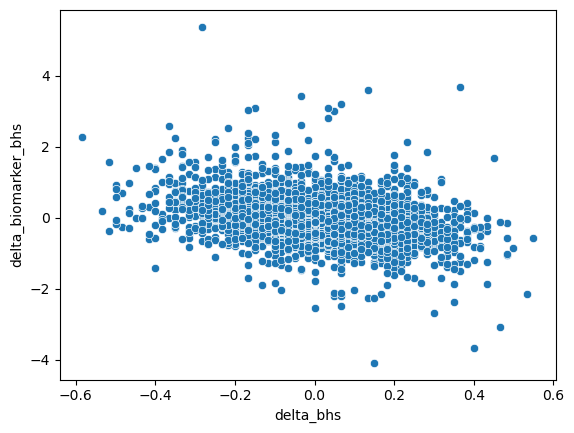

In [8]:
sns.scatterplot(
    x=df5[(df5["age.0.0"]>=50) & (df5["age.0.0"]<=64)]['delta_bhs'], 
    y=df5[(df5["age.0.0"]>=50) & (df5["age.0.0"]<=64)]['delta_biomarker_bhs'])